# Data Science Project: Bank Marketing (Campaign)
## Exploratory Data Analysis (EDA)


### Problem description:
ABC Bank wants to sell its term deposit product to customers and before launching the product they want to develop a model which help them in understanding whether a particular customer will buy their product or not (based on customer's past interaction with bank or other Financial Institution).


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
file_path = r"C:\Users\dorti\Documents\DataGlacier\Week10\Data Science Project w4\bank-additional-full.csv"
df = pd.read_csv(file_path, sep=";")

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
print(df.duplicated().sum())

12


### There are 12 duplicate observation, so we proceed to drop the duplicate values.

In [10]:
df = df.drop_duplicates()

In [11]:
cat_features = []
num_features = []

for i in df.columns:
    if df[i].dtype == "object":
        cat_features.append(i)    

cat_features.remove("y")

for i in df.columns:
    if df[i].dtype != "object":
        num_features.append(i)

### Looking for unique values in the categorical features

In [12]:
for i in cat_features:
    print(f"{i}: {df[i].unique()}\n")

job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

marital: ['married' 'single' 'divorced' 'unknown']

education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

default: ['no' 'unknown' 'yes']

housing: ['no' 'yes' 'unknown']

loan: ['no' 'yes' 'unknown']

contact: ['telephone' 'cellular']

month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']

poutcome: ['nonexistent' 'failure' 'success']



### Looking for outliers in the numerical columns of the dataset:

In [13]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


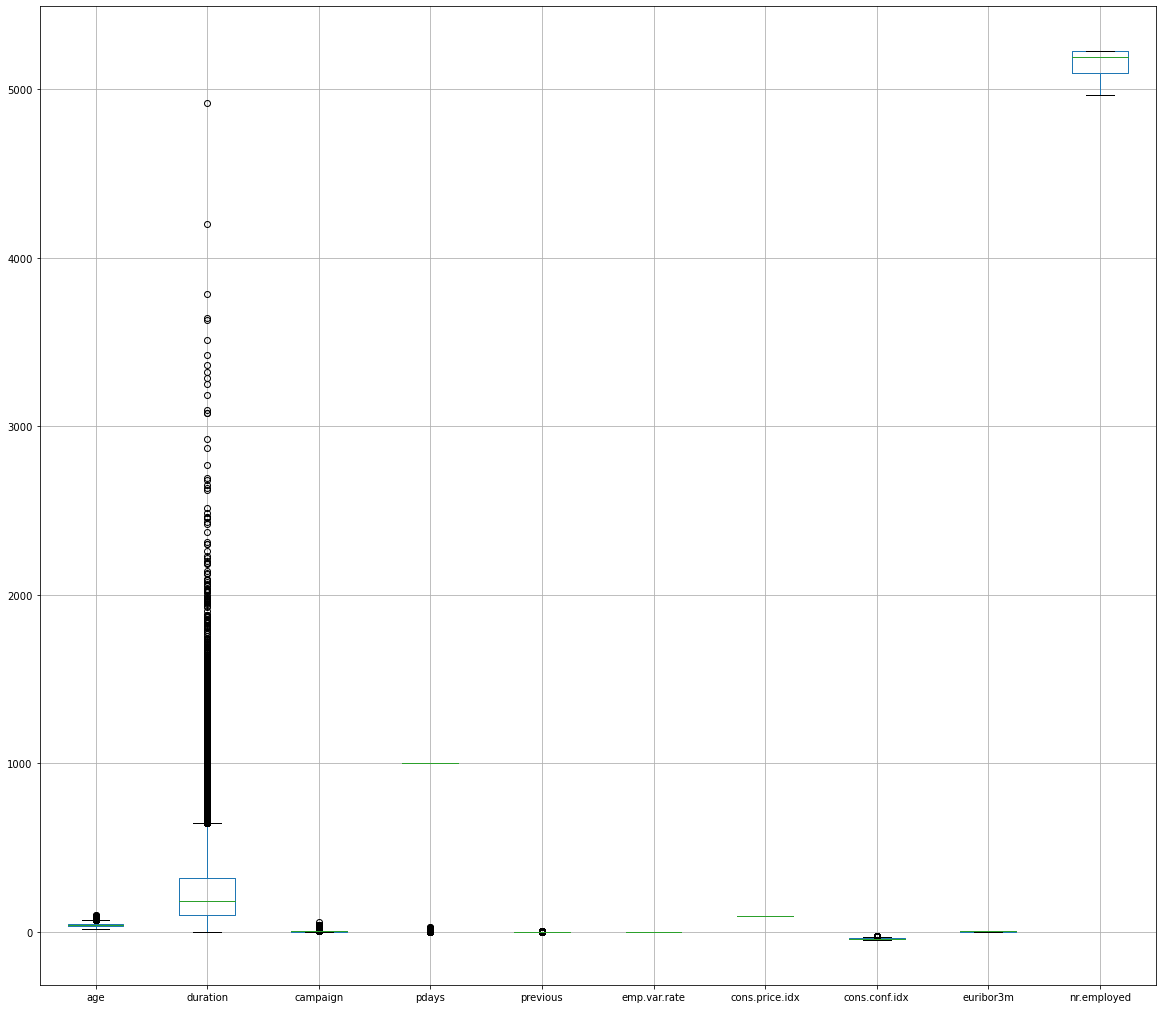

In [14]:
df.boxplot(figsize=(20,18))
plt.show()

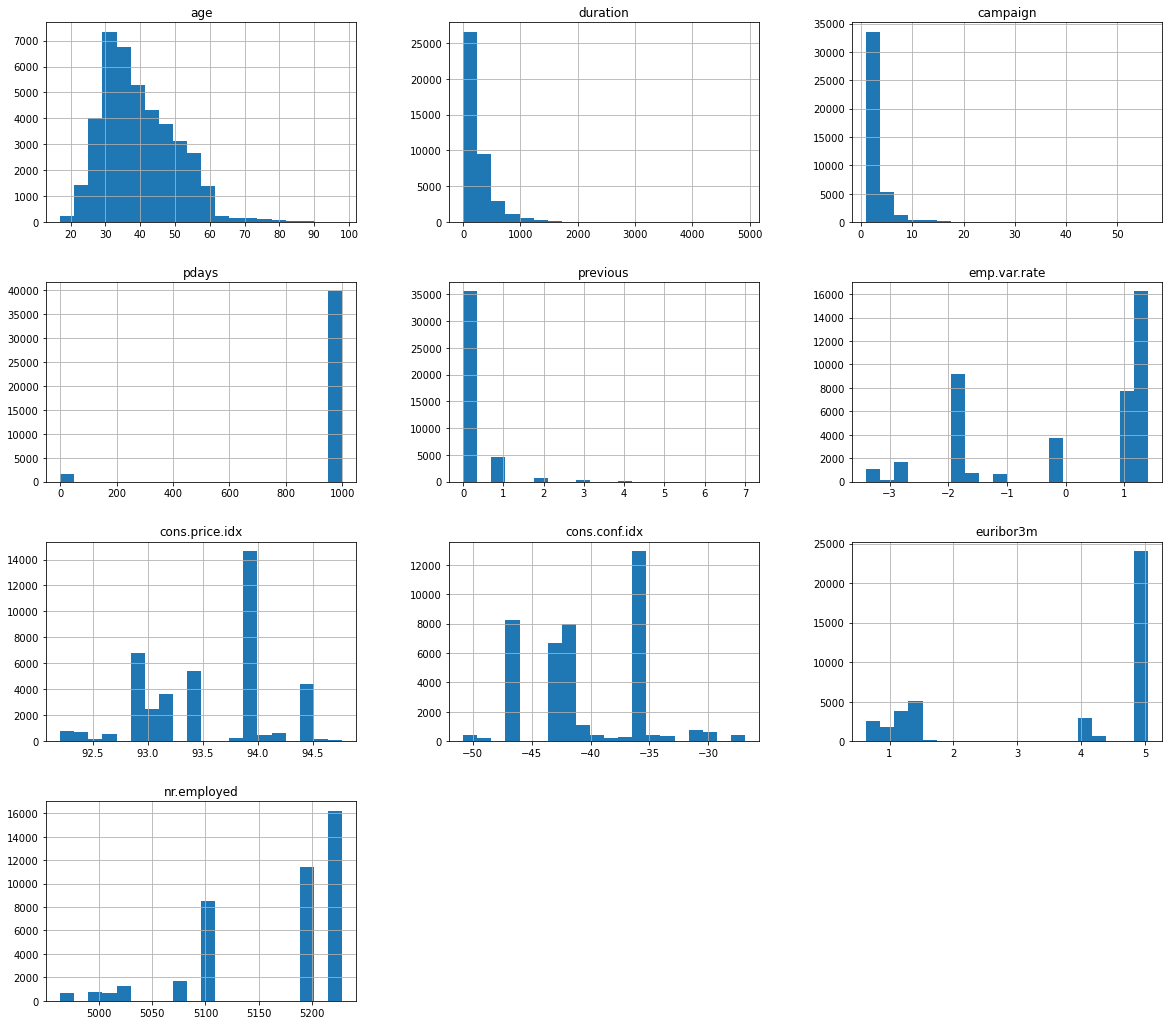

In [15]:
df.hist(bins=20,figsize=(20,18))
plt.show()

In [16]:
df["pdays"].replace(999,0, inplace = True)

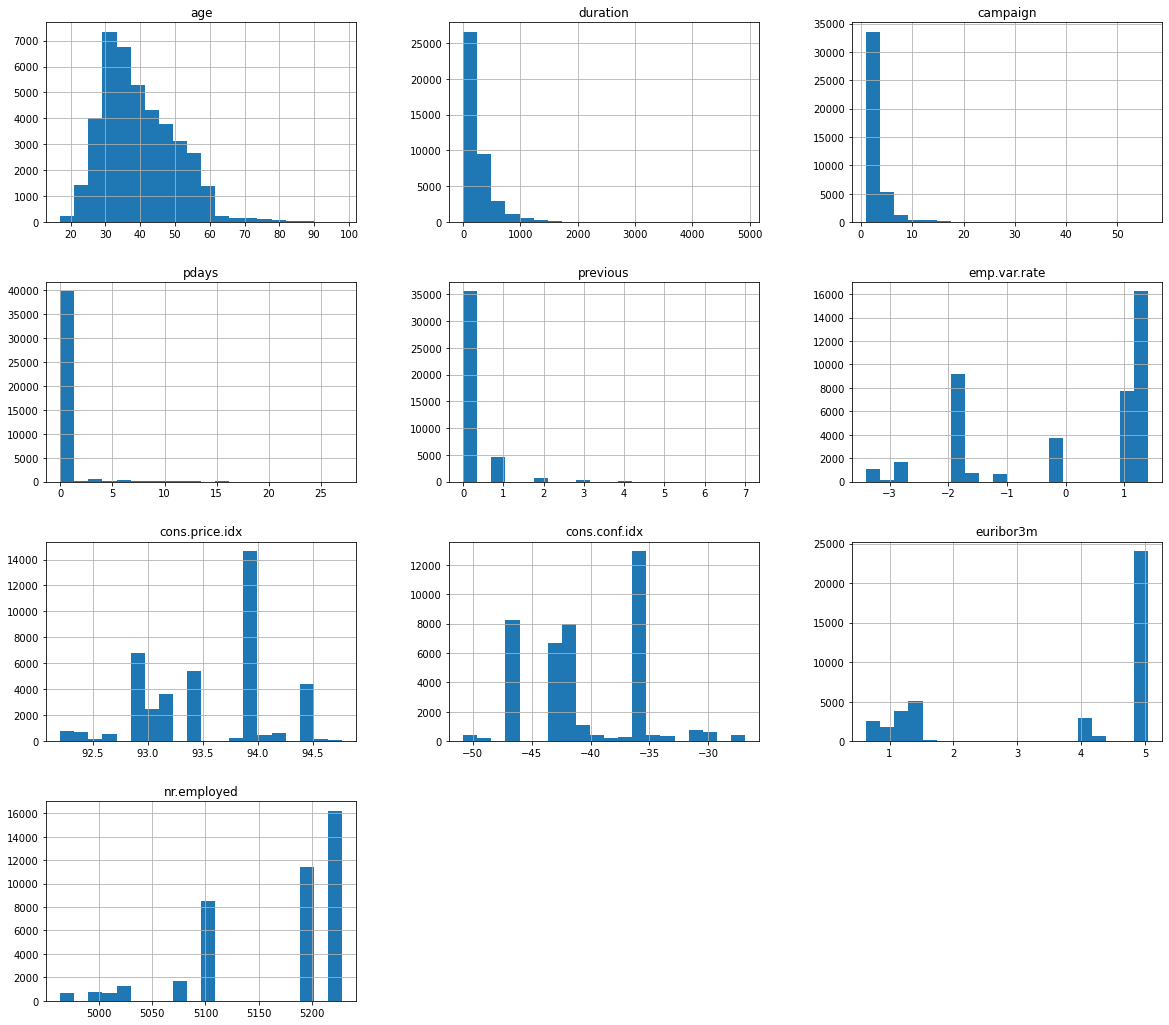

In [17]:
df.hist(bins=20,figsize=(20,18))
plt.show()

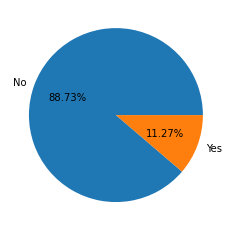

In [57]:
product_acceptance = df[["y"]].value_counts()
plt.pie(product_acceptance, labels = ["No","Yes"], autopct='%1.2f%%')
plt.show()

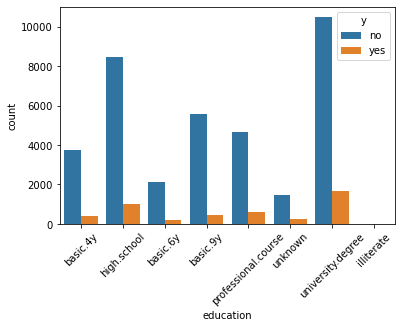

In [64]:
sns.countplot(x = "education", data = df, hue = "y")
plt.xticks(rotation = 45)
plt.show()

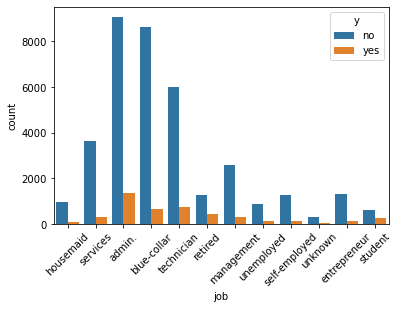

In [65]:
sns.countplot(x = "job", data = df, hue = "y")
plt.xticks(rotation = 45)
plt.show()

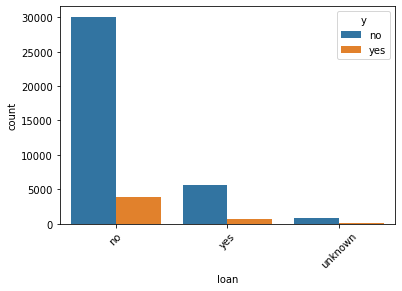

In [66]:
sns.countplot(x = "loan", data = df, hue = "y")
plt.xticks(rotation = 45)
plt.show()

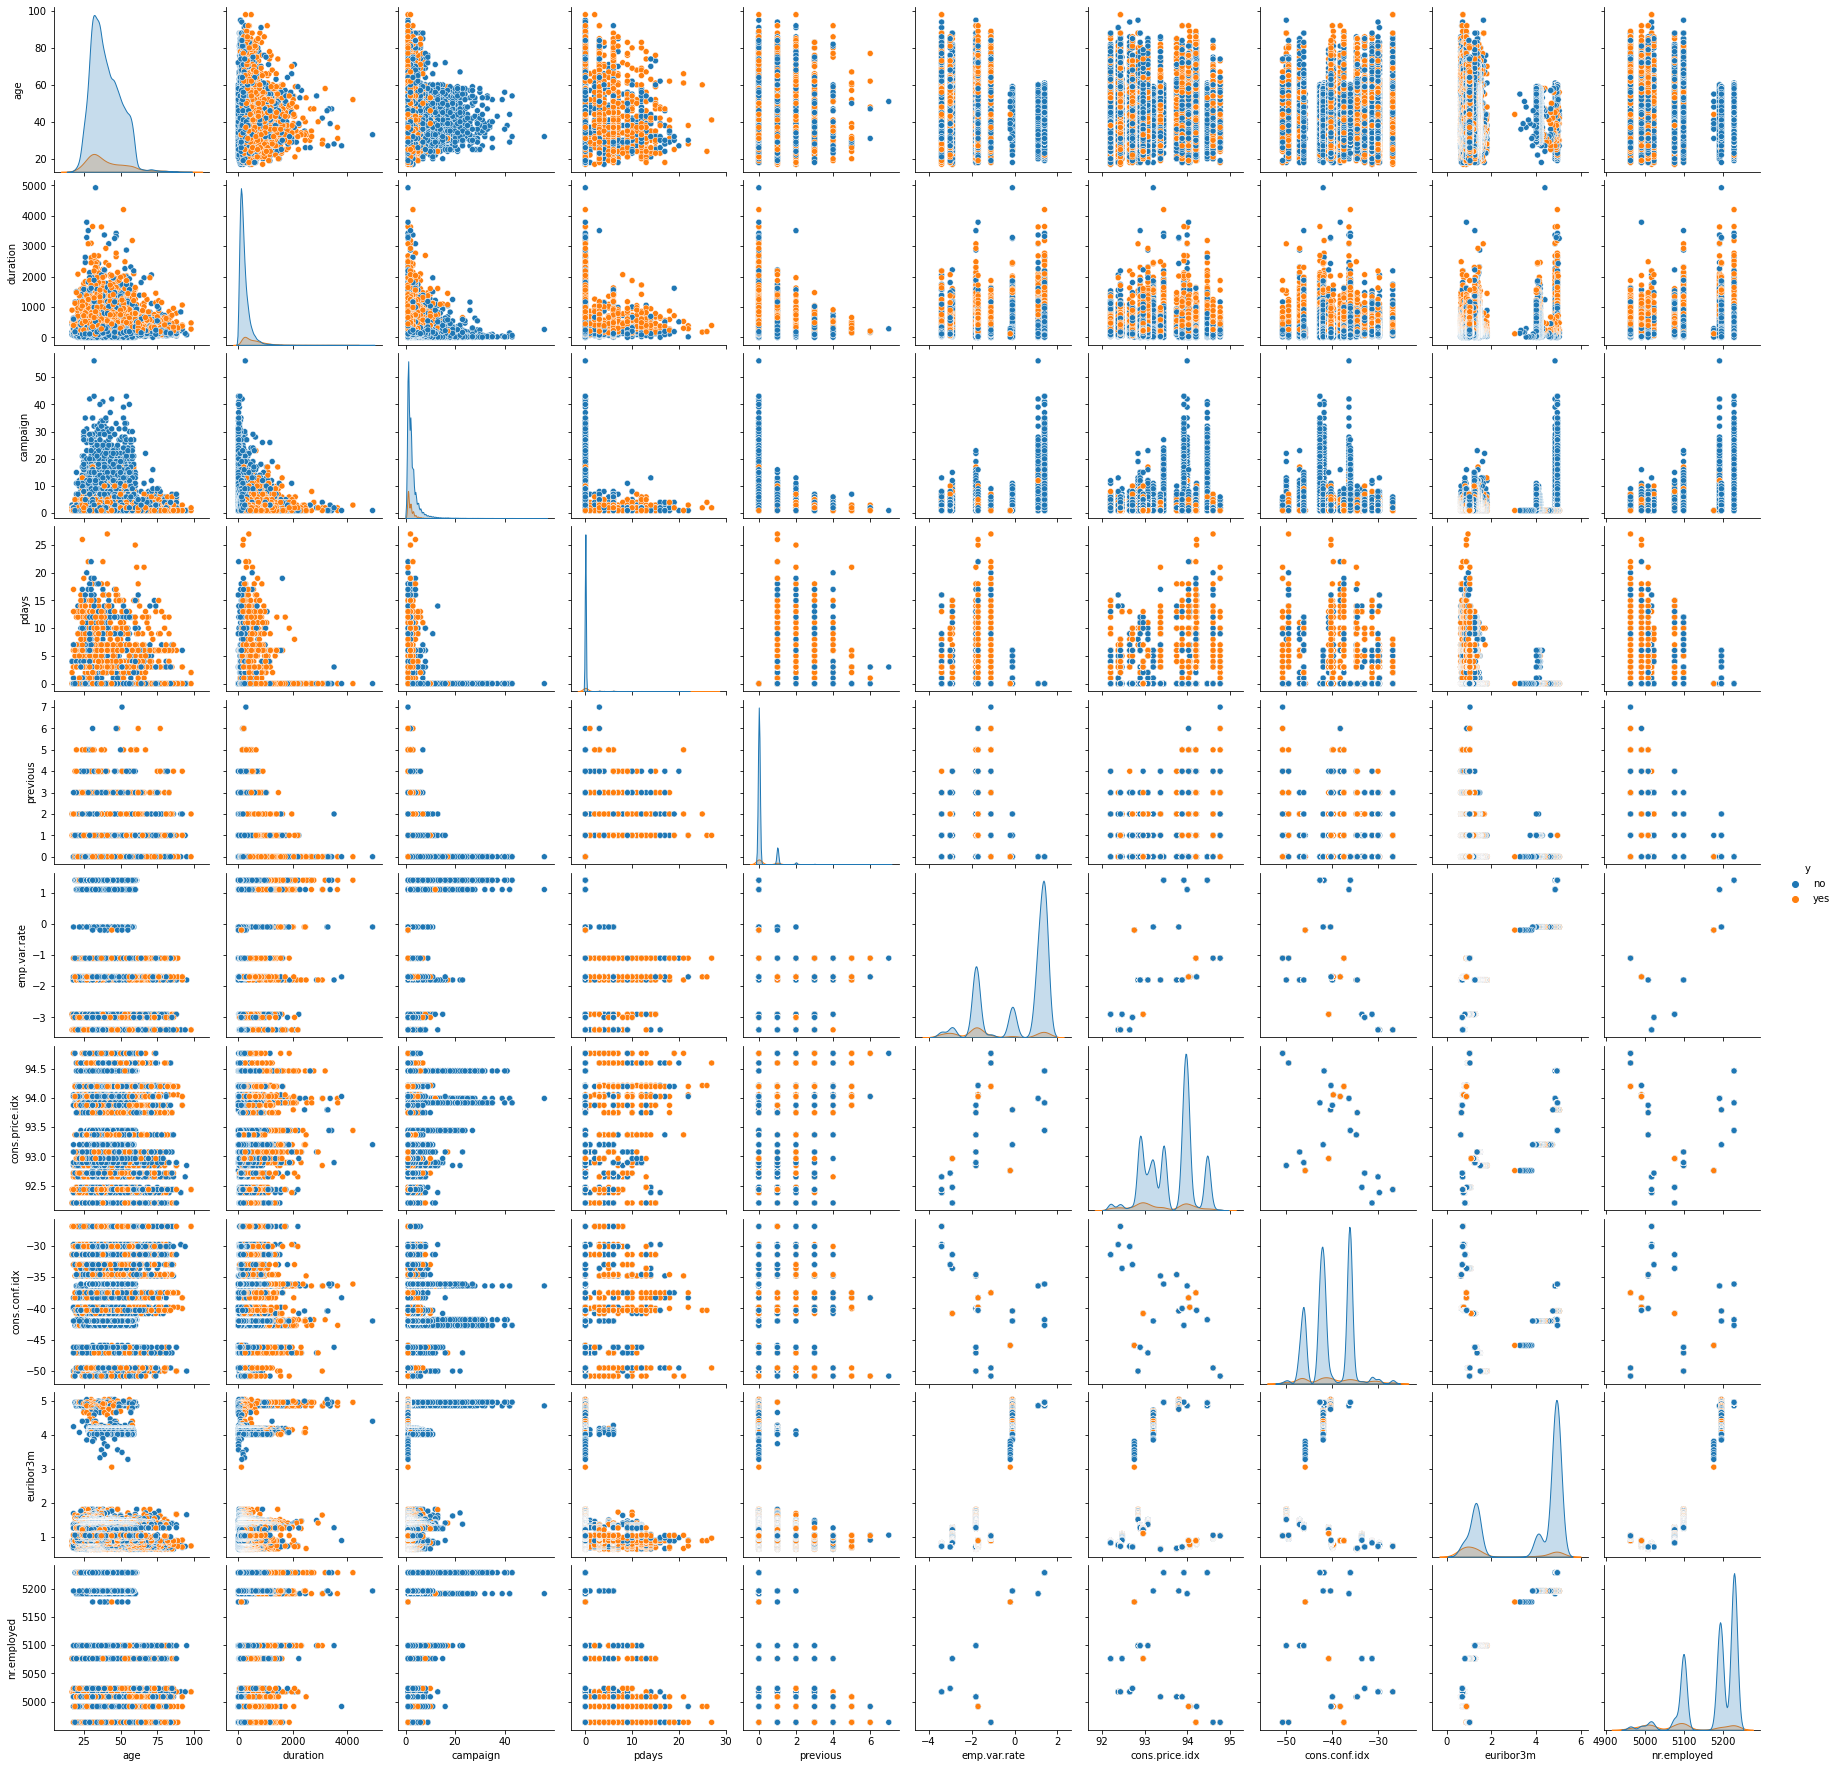

In [71]:
sns.pairplot(df, hue = "y", corner = True)